In [3]:
pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ---------------------------------------- 82.7/82.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=f6b33173e76a11bcff38340f93ec8b74b2e307837a47213888ba5d1947992860
  Stored in directory: c:\users\glasr\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


# https://www.kaggle.com/datasets/vagifa/meatconsumption

# 변수 설명

- **LOCATION**: 국가 코드 이름
- **SUBJECT**: 고기 종류(돼지, 쇠고기 등)
- **TIME**: 데이터가 기록된 연도
- **MEASURE**: 값을 표시하는데 사용되는 측정값
- **VALUE**: 측정값 따른 값
re


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Meat_consumption = pd.read_csv('meat_consumption_worldwide.csv')
Meat_consumption

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226
...,...,...,...,...,...
13755,MYS,SHEEP,THND_TONNE,2022,44.154151
13756,MYS,SHEEP,THND_TONNE,2023,44.897588
13757,MYS,SHEEP,THND_TONNE,2024,45.612107
13758,MYS,SHEEP,THND_TONNE,2025,46.325312


In [82]:
Meat_consumption.describe()

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.861701e+03
std,10.600740,9.385656e+03
min,1990.000000,1.669000e-09
25%,1999.000000,3.475390e+00
50%,2008.000000,2.313983e+01
75%,2017.000000,2.967790e+02
max,2026.000000,1.316073e+05


In [84]:
print(Meat_consumption.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB
None


### 상관관계 분석은 숫자 데이터를 가진 열들 사이에서만 비교가 가능하다! 이 점을 명심하자!

##### 이유: 상관관계는 두 변수 간의 선형관계를 측정한다. 따라서 값들이 숫자 형태로 연속적인 분포를 가져야 계산이 가능하다.

상관관계는 두 변수들끼리 비교할 때 하나의 변수가 움직일 때 다른 변수는 어떻게 움직이는지 알고 싶어서 하는 분석이다. 예를 들어서 운동을 많이 하면 체중이 줄어드는 경우가 생기는 데 이럴 때는 음의 상관관계이다. 여기서 주의할 점은 상관관계는 인과관계가 아니다. 이 점을 꼭 기억하자!

In [87]:
corr = Meat_consumption[['Value', 'TIME']].corr(method = 'pearson')
print(corr) 

# 시간이랑 측정값에 따른 상관관계는 적은듯?

          Value      TIME
Value  1.000000  0.053866
TIME   0.053866  1.000000


In [89]:
!pip install seaborn


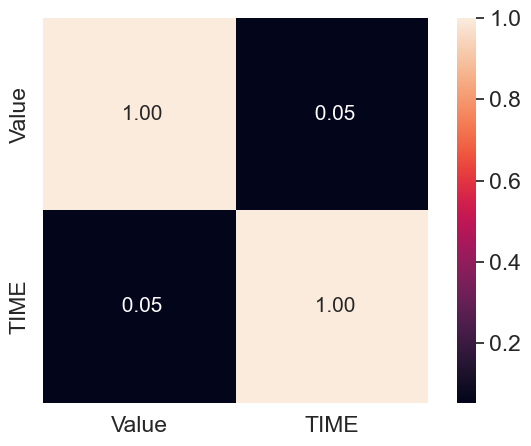

In [90]:
import seaborn as sns

cols_view = ['Value', 'TIME']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = ' .2f',
                 annot_kws = {'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

# sns의 heatmap으로 상관행렬을 이렇게 예쁘게 그릴 수 있다.

# plt.tight_layout(): 그래프의 레이아웃을 자동으로 조정해 요소 간 간격이 겹치지 않도록 하는 기능을 한다.
# 따라서 히트맵,라벨,색상 막대가 서로 겹치지 않고 깔끔하게 정렬된다.


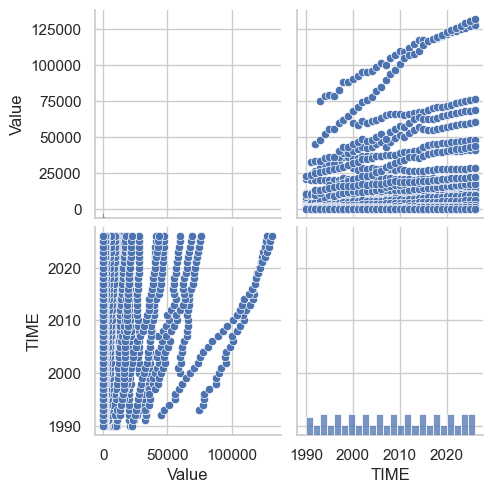

In [91]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(Meat_consumption[['Value', 'TIME']], height=2.5)
plt.show()


### 결측치 여부 확인

In [93]:
print(Meat_consumption.isnull().sum())
print('---------------------------------------------')
print(Meat_consumption.dtypes)

# 다행히도 결측치는 존재하지 않아!

LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64
---------------------------------------------
LOCATION     object
SUBJECT      object
MEASURE      object
TIME          int64
Value       float64
dtype: object


In [94]:
# LOCATION에 어떤 값들이 있는지 확인해보자
# 확인할 때는 unique()를 사용하자!
print(Meat_consumption['LOCATION'].unique())

['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'HTI' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'MYS' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA'
 'THA' 'UKR' 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'EU28' 'NOR'
 'CHE']


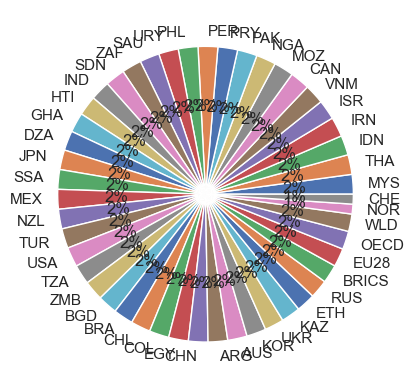

In [95]:
labels = Meat_consumption['LOCATION'].value_counts().index.tolist()
fracs1 = Meat_consumption['LOCATION'].value_counts().values.tolist()

plt.pie(fracs1, labels=labels, autopct='%.0f%%')
plt.show()

In [96]:
result = Meat_consumption.groupby('LOCATION').agg(['mean', 'min', 'max', 'sum'])
result.head()

# 이렇게 하니까 오류가 난다
# 데이터프레임의 특정열이 문자열이나 비수치 데이터라서 계산하려 시도하다가 발생한다.

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# 수치형 데이터만 선택
numeric_cols = Meat_consumption.select_dtypes(include=['number'])
result = Meat_consumption.groupby('LOCATION')[numeric_cols.columns].agg(['mean', 'min', 'max', 'sum'])
result_reset = result.reset_index()
print(result_reset.head(10))
# 이렇게 고치면 된다. select_dtypes(include=['number']) 이것을 사용하면 된다.

## 전체 평균보다 많은 육류를 소비하는 대륙을 구한다

In [104]:
total_mean = Meat_consumption['Value'].mean()
nation_mean = Meat_consumption.groupby('LOCATION')['Value'].mean()
continent_over_mean = nation_mean[nation_mean >= total_mean]
print(continent_over_mean)

LOCATION
BRA       2061.138041
BRICS    13265.943378
CHN       8857.474265
EU28      5303.717968
OECD     12905.109858
USA       4589.957291
WLD      34752.261797
Name: Value, dtype: float64


In [106]:
maximun_nation = nation_mean.idxmax()
print(maximun_nation)

# 이렇게 하면 전세계가 나오네...

WLD


### value_counts() 함수는 중복된 값들의 개수를 세는 함수이다

즉, nation_mean의 각 값이 얼마나 등장했는지를 세는 데 사용된다. 하지만 여기서는 평균값을 이미 계산한 상태이고, 각 국가별로 Value의 평균값만 있으므로 중복된 값이 없을 가능성이 크다.
따라서 value_counts() 대신 내림차순으로 상위 10개의 값을 구하려면 nlargest()를 사용하는 것이 더 적합하다.

In [109]:
meat_consum_ranking = nation_mean.value_counts()[:10]
print(meat_consum_ranking)

C:\Users\glasr\AppData\Local\Temp\ipykernel_20324\290888349.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  meat_consum_ranking = nation_mean.value_counts()[:10]


KeyError: 10

In [111]:
meat_consum_ranking = nation_mean.nlargest(10)
print(meat_consum_ranking)


LOCATION
WLD      34752.261797
BRICS    13265.943378
OECD     12905.109858
CHN       8857.474265
EU28      5303.717968
USA       4589.957291
BRA       2061.138041
RUS       1152.820863
SSA       1040.190736
MEX        764.175500
Name: Value, dtype: float64


In [115]:
!pip install scipy

In [117]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
USA = Meat_consumption.loc[Meat_consumption['LOCATION']=='USA']
BRA = Meat_consumption.loc[Meat_consumption['LOCATION']=='BRA']

from scipy import stats
tTestResult = stats.ttest_ind(USA['Value'], BRA['Value'])
tTestResultDiffVar = stats.ttest_ind(USA['Value'], BRA['Value'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)


The t-statistic and p-value assuming equal variances is 6.288 and 0.000.
The t-statistic and p-value not assuming equal variances is 6.288 and 0.000
